# SIMULADOR DE ESTRUTURAS COM TRELIÇAS PLANAS

## Introdução 

## Estrutura do Código 

#### Imports das funções importantes

In [21]:
# Imports das Funções
from funcoesTermosol import *
from funcoes_PF import *
import pandas as pd

#### Importando dados do arquivo de entrada 

In [22]:
#importando os dados
[nn,N,nm,Inc,nc,F,nr,R] = importa('entrada-PF.xlsx')

#Modulo de elasticidade
E = Inc[0,2]

#Area secao transversal
A = Inc[0,3]

print(f"""O módulo de elasticidade das treliças é: {E} kPa. A área de seção trnavesal dessas treliças é {A} m2""")

O módulo de elasticidade das treliças é: 210000000000.0 kPa. A área de seção trnavesal dessas treliças é 0.0007068583470577034 m2


In [23]:
F

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.]])

#### Plotando o esquema do arquivo de entrada
![Screenshot](fotos/diagrama.png)

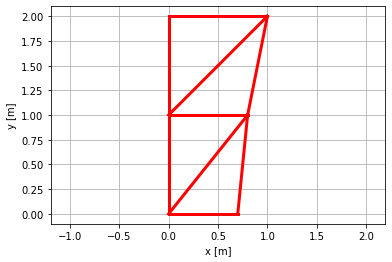

In [24]:
plota(N,Inc)

#### Criando matriz de conectividade

In [25]:
# Calculando matriz de conectividade
C = conectividade(Inc, nn, nm)
C

array([[ 0., -1., -1., -1.,  0.,  0.,  0.,  0.,  0.],
       [-1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0., -1., -1., -1.,  0.,  0.],
       [ 1.,  0.,  1.,  0.,  1.,  0.,  0., -1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0., -1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.]])

#### Calculando a Matriz dos Membros 

In [26]:
# Calcula matriz dos membros
M = membros(N,C)
M

array([[0.1, 0. , 0.8, 0.7, 0.8, 0. , 1. , 0.2, 1. ],
       [1. , 1. , 1. , 0. , 0. , 1. , 1. , 1. , 0. ]])

#### Calculando a Matriz de comprimento para cada elemento

In [27]:
# Calcula o comprimento de cada elemento
l = calcula_l(M)
l

array([[1.00498756],
       [1.        ],
       [1.28062485],
       [0.7       ],
       [0.8       ],
       [1.        ],
       [1.41421356],
       [1.0198039 ],
       [1.        ]])

#### Calculando a Matriz trigonométrica

In [28]:
# Calcula matriz dos senos e cossenos
trig = calcula_trig(N,M,l)
trig

array([[-0.09950372, -0.99503719,  0.09950372,  0.99503719],
       [-0.        , -1.        ,  0.        ,  1.        ],
       [-0.62469505, -0.78086881,  0.62469505,  0.78086881],
       [-1.        , -0.        ,  1.        ,  0.        ],
       [-1.        , -0.        ,  1.        ,  0.        ],
       [-0.        , -1.        ,  0.        ,  1.        ],
       [-0.70710678, -0.70710678,  0.70710678,  0.70710678],
       [-0.19611614, -0.98058068,  0.19611614,  0.98058068],
       [-1.        , -0.        ,  1.        ,  0.        ]])

#### Calculando Matriz de Rigidez Sem condições de Contorno

In [29]:
#Calcula matriz de rigidez global e de cada elemento
Kg,Ke = calcula_Ke(C,M,E,A,nn)
Kg

array([[ 2.57291597e+08,  5.65426164e+07, -2.12057504e+08,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -4.52340931e+07, -5.65426164e+07,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 5.65426164e+07,  2.19118523e+08,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -1.48440253e+08,
        -5.65426164e+07, -7.06782705e+07,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-2.12057504e+08,  0.00000000e+00,  2.13519916e+08,
         1.46241161e+07,  0.00000000e+00,  0.00000000e+00,
        -1.46241161e+06, -1.46241161e+07,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  1.46241161e+07,
         1.46241161e+08,  0.00000000e+00,  0.00000000e+00,
        -1.46241161e+07, -1.46241161e+08,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.0000000

#### Criando Matriz de Rigidez com as Condições de Contorno Aplicadas 

In [30]:
# Matriz de rigidez global com condicoes de contorno aplicadas
Kg_cc = aplica_cc(Kg,R)
Kg_cc

array([[ 2.38031871e+08,  5.24815547e+07, -1.85550316e+08,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -5.24815547e+07, -5.24815547e+07],
       [ 5.24815547e+07,  3.49362060e+08,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -1.48440253e+08,
        -5.24815547e+07, -5.24815547e+07],
       [-1.85550316e+08,  0.00000000e+00,  2.37845192e+08,
         9.91585869e+07,  0.00000000e+00,  0.00000000e+00,
        -5.59837090e+06, -2.79918545e+07],
       [ 0.00000000e+00,  0.00000000e+00,  9.91585869e+07,
         3.56878704e+08,  0.00000000e+00,  0.00000000e+00,
        -2.79918545e+07, -1.39959273e+08],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.48440253e+08,  0.00000000e+00,
        -1.48440253e+08,  0.00000000e+00],
       [ 0.00000000e+00, -1.48440253e+08,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.48440253e+08,
         0.00000000e+00,  0.00000000e+00],
       [-5.24815547e+07, -5.248155

#### Criando Vetor de Forças com as Confições de Contorno Aplicadas 

In [31]:
# Vetor de Forcas com condicoes de contorno
F_cc = aplica_cc(F,R)
F_cc

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.]])

#### Calculando os Deslocamentos Pelo Método de Jacobi 

In [32]:
# Calcula deslocamentos
u = calcula_jacobi(Kg_cc, F_cc, 1e-5)
u

/Users/beatrizcf/Engenharia/5Semestre/Transca/PF/funcoes_PF.py:98: RuntimeWarning: invalid value encountered in true_divide
  err = max(abs((xnew-x)/xnew))


array([[ 0.0014296 ],
       [ 0.00119362],
       [-0.00040273],
       [ 0.00079761],
       [ 0.00245309],
       [-0.00102297],
       [-0.00286239],
       [-0.00208587]])

#### Completando a Matriz de deslocamentos 

![Screenshot](fotos/diagrama.png)

In [40]:
u_comp

array([[ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.0014296 ],
       [ 0.00119362],
       [-0.00040273],
       [ 0.00079761],
       [ 0.00245309],
       [-0.00102297],
       [-0.00286239],
       [-0.00208587]])

In [33]:
# Matriz de deslocamentos completa (sem condicoes de contorno)
u_comp = calcula_u_comp(u,R)
nos = []
deslocamentos_x = []
deslocamentos_y = []
for i in range(len(u_comp)):
    if i%2 == 0:
        deslocamentos_x.append(u_comp[i])
        nos.append(int(i/2+1))
    else:
        deslocamentos_y.append(u_comp[i])
        
deslocamentos_nodais = pd.DataFrame()
deslocamentos_nodais['Nodes'] = nos
deslocamentos_nodais['Displacement in X'] = deslocamentos_x
deslocamentos_nodais['Displacement in Y'] = deslocamentos_y

deslocamentos_nodais

,Nodes,Displacement in X,Displacement in Y
0,1,[0.0],[0.0]
1,2,[0.0],[0.0]
2,3,[0.0014295986699542466],[0.0011936217467846792]
3,4,[-0.00040273154140567396],[0.0007976071781262212]
4,5,[0.0024530910010341026],[-0.0010229744527742968]
5,6,[-0.0028623945750693965],[-0.002085870065721825]


#### Calculando Reações de Apoio as Deformações, Tensões e Forças Internas

In [34]:
#Calcula as reacoes de apoio
r_apoio = calcula_r_apoio(Kg, u_comp, R)
r_apoio

array([[ -26881.60064616],
       [-210783.51474602],
       [ -11075.34065815],
       [-110753.40658145]])

In [35]:
# Calcula deformacoes
d = calcula_deformacao(Inc,u_comp,l,R,trig)
#Calcula tensoes
t = calcula_tensao(E,d)
F_interno = A*t 


df_informacoes = pd.DataFrame()
elementos = []
for i in range(nm):
    elementos.append(i+1)

df_informacoes['Element'] = elementos
df_informacoes['Deformation'] = d
df_informacoes['Tensile Force'] = F_interno
df_informacoes['Longitudinal Stress'] = t
df_informacoes

,Element,Deformation,Tensile Force,Longitudinal Stress
0,1,0.000750,111305.796076,1.574655e+08
1,2,0.001194,177181.513938,2.506606e+08
2,3,0.000290,43031.557160,6.087720e+07
3,4,0.000000,0.000000,0.000000e+00
4,5,-0.002290,-339989.449922,-4.809867e+08
5,6,-0.002217,-329032.100400,-4.654852e+08
6,7,-0.003786,-561956.578316,-7.950059e+08
7,8,-0.003246,-481775.665193,-6.815731e+08
8,9,-0.005315,-789032.023108,-1.116252e+09


#### Plotando gráfico com a deformação do problema (Ampliado em 1000 vezes)

#### Gerando Saída txt com informações relevantes

In [36]:
geraSaida("saida-final", r_apoio, u_comp, d, F_interno, t)

## Conclusão 

## Referências 

In [37]:
print(max(F_interno))

[177181.51393831]


In [38]:
F_interno

array([[ 111305.7960759 ],
       [ 177181.51393831],
       [  43031.55715961],
       [      0.        ],
       [-339989.44992226],
       [-329032.10040008],
       [-561956.57831648],
       [-481775.66519327],
       [-789032.02310805]])